In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
import string

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [19]:
student_df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [4]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Functions

In [55]:
def barplot_comparison(df,y_col,x_list):
    plt.figure(figsize=(15,5))
    plt.suptitle("Comparing {} by {}".format(string.capwords(', '.join(x_list)),
                                             string.capwords(y_col)),
                 fontsize=16)
    for subplot, score in enumerate(x_list,1):
        ax = plt.subplot(1,3,subplot)
        g=sns.barplot(x=score,
                    y=y_col,
                    data=df)
    plt.tight_layout()
    plt.show()
    all_cols = x_list.insert(0,y_col)
    grouped_values = df[x_list].groupby(y_col)
    print(grouped_values.describe())

# Assignment

## 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

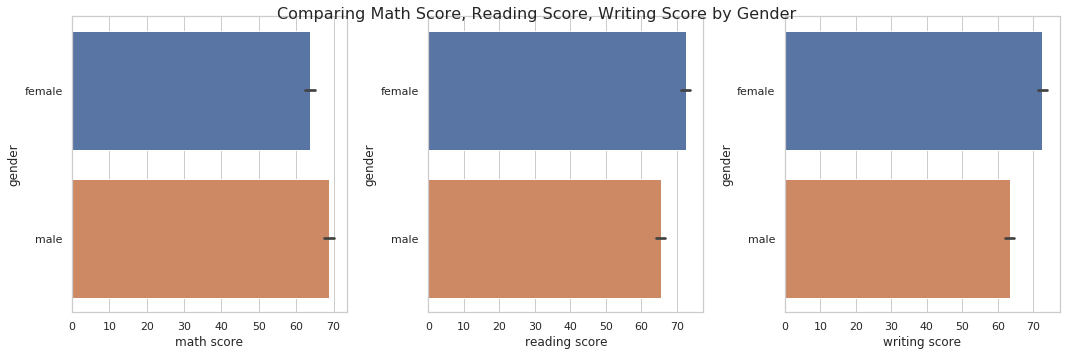

       math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0 

In [56]:
barplot_comparison(student_df,
                   'gender',
                   ['math score','reading score','writing score'])

__Women outperform men in reading and writing, but men do better than women in math.__

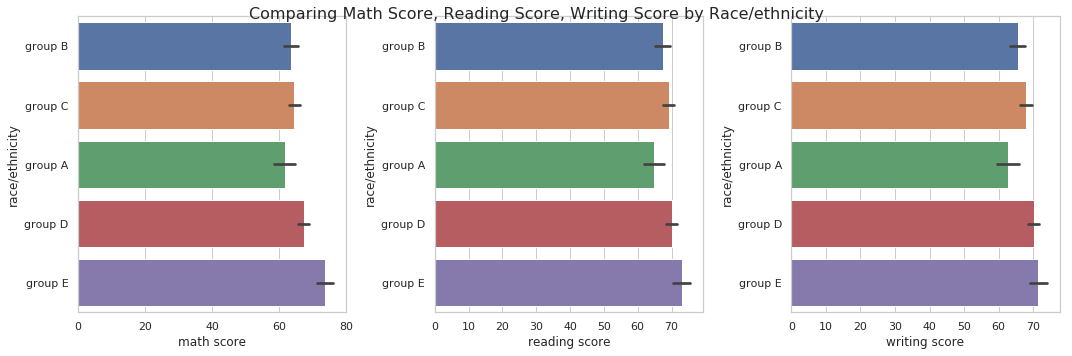

               math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              89.0  61.629213  14.523008  28.0  51.00  61.0  71.0   
group B             190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   
group C             319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   
group D             262.0  67.362595  13.769386  26.0  59.00  69.0  77.0   
group E             140.0  73.821429  15.534259  30.0  64.75  74.5  85.0   

                      reading score             ...                \
                  max         count       mean  ...    75%    max   
race/ethnicity                                  ...                 
group A         100.0          89.0  64.674157  ...  74.00  100.0   
group B          97.0         190.0  67.352632  ...  79.75   97.0   
group C          98.0         319.0  69.103448

In [57]:
barplot_comparison(student_df,
                   'race/ethnicity',
                   ['math score','reading score','writing score'])

__It looks like these race/ethnicity groups consistently rank the same across all three test scores:__
1. Group E
2. Group D
3. Group C
4. Group B
5. Group A

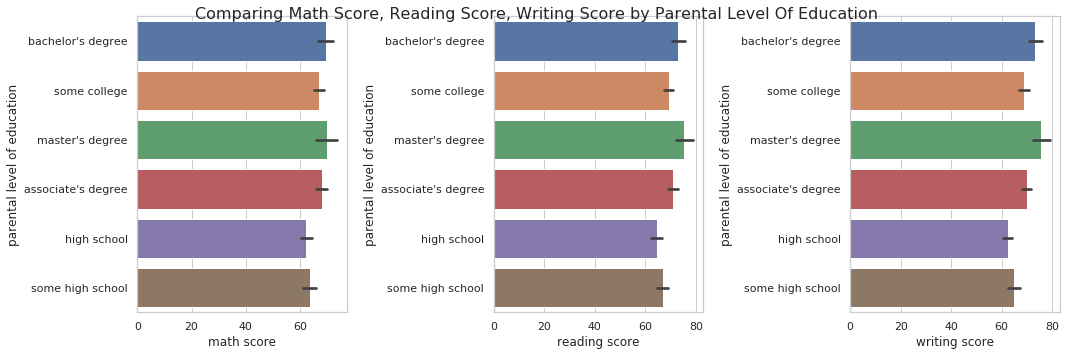

                            math score                                     \
                                 count       mean        std   min    25%   
parental level of education                                                 
associate's degree               222.0  67.882883  15.112093  26.0  57.00   
bachelor's degree                118.0  69.389831  14.943789  29.0  61.00   
high school                      196.0  62.137755  14.539651   8.0  53.75   
master's degree                   59.0  69.745763  15.153915  40.0  55.50   
some college                     226.0  67.128319  14.312897  19.0  59.00   
some high school                 179.0  63.497207  15.927989   0.0  53.00   

                                               reading score             ...  \
                              50%   75%    max         count       mean  ...   
parental level of education                                              ...   
associate's degree           67.0  80.0  100.0         222.0  70.9

In [58]:
barplot_comparison(student_df,
                   'parental level of education',
                   ['math score','reading score','writing score'])

__These groups also seem to fall into a consistent ranking across all three test scores:__
1. Master's degree
2. Bachelor's degree
3. Associate's degree
4. Some college
4. Some high school
5. High school

The last two buck the trend of more parental education = higher scores.

## 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?



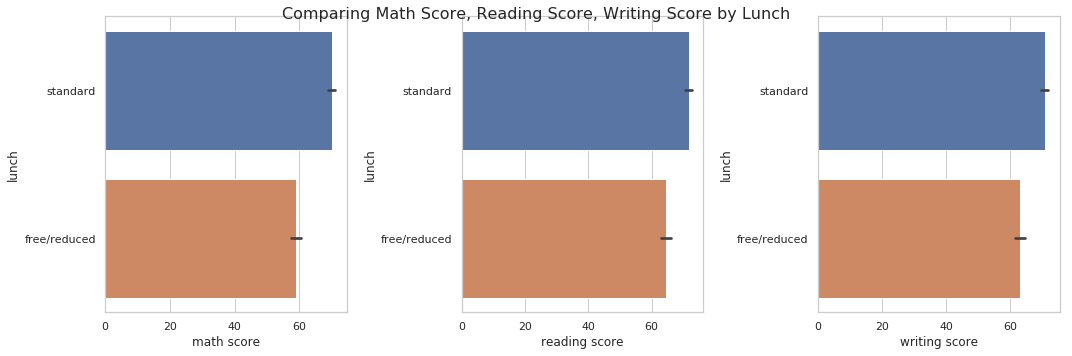

             math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             reading score             ...              writing score  \
                     count       mean  ...   75%    max         count   
lunch                                  ...                              
free/reduced         355.0  64.653521  ...  75.0  100.0         355.0   
standard             645.0  71.654264  ...  82.0  100.0         645.0   

                                                                   
                   mean        std   min   25%   50%   75%    max  
lunch                                                              
free/reduced  63.022535  15.4

In [59]:
barplot_comparison(student_df,
                   'lunch',
                   ['math score','reading score','writing score'])

__Best guess--parents with less education (which we saw above affected test scores) are making less money. Their children are the recipients of free or reduced lunches.__

## 3. Does the test preparation course seem to have an effect on the exam performances?

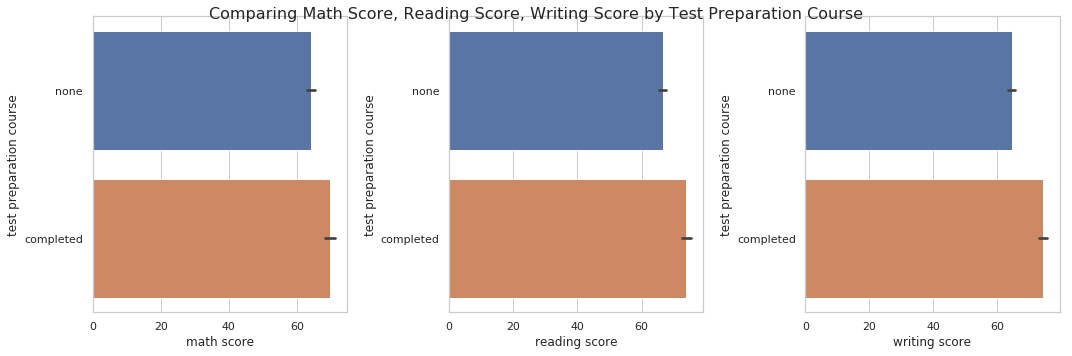

                        math score                                          \
                             count       mean        std   min   25%   50%   
test preparation course                                                      
completed                    358.0  69.695531  14.444699  23.0  60.0  69.0   
none                         642.0  64.077882  15.192376   0.0  54.0  64.0   

                                      reading score             ...        \
                           75%    max         count       mean  ...   75%   
test preparation course                                         ...         
completed                79.00  100.0         358.0  73.893855  ...  84.0   
none                     74.75  100.0         642.0  66.534268  ...  76.0   

                               writing score                              \
                           max         count       mean        std   min   
test preparation course                                                

In [60]:
barplot_comparison(student_df,
                   'test preparation course',
                   ['math score','reading score','writing score'])

__YES. Scores across all three test categories are higher for those who completed the test prep courses.__

## 4. Which 2 exam scores are most correlated with each other?

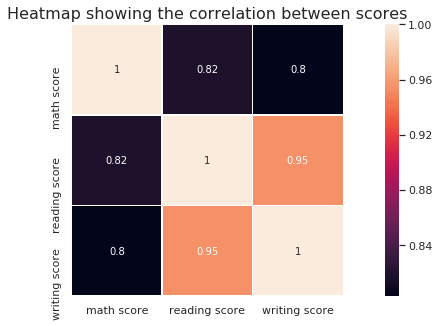

In [61]:
plt.figure(figsize=(15,5))
corrmap = student_df.corr()
sns.heatmap(corrmap, square=True, annot=True, linewidths=.5)
plt.title("Heatmap showing the correlation between scores",fontsize=16)
plt.show()

__That would be the reading and writing scores, which have a correlation coefficient of .95.__

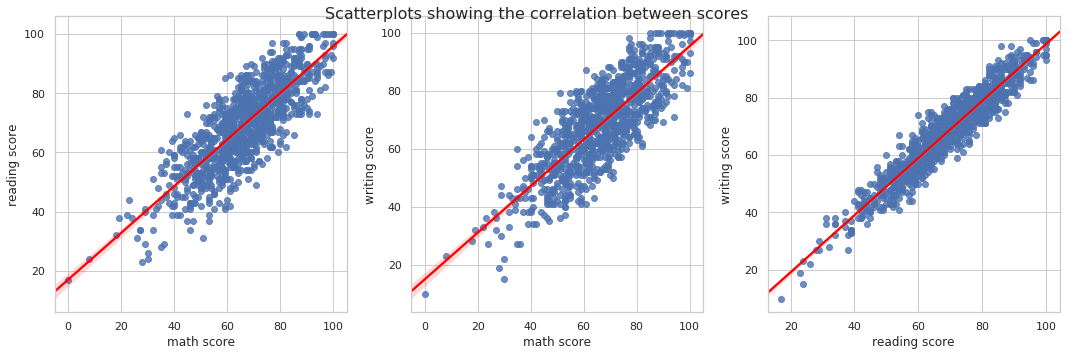

In [62]:
plt.figure(figsize=(15,5))
plt.suptitle("Scatterplots showing the correlation between scores",fontsize=16)
subplot1 = plt.subplot(1,3,1)
scatter1 = sns.regplot(x='math score',y='reading score',
                       data=student_df,
                       line_kws={'color':'red'})
subplot2 = plt.subplot(1,3,2)
scatter2 = sns.regplot(x='math score',y='writing score',
                       data=student_df,
                       line_kws={'color':'red'})
subplot3 = plt.subplot(1,3,3)
scatter3 = sns.regplot(x='reading score',y='writing score',
                       data=student_df,
                       line_kws={'color':'red'})
plt.tight_layout()
plt.show()

__Points are most tightly grouped in the reading/writing plot.__